In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read dataset
data=pd.read_csv('cancer_reg.csv', encoding='ISO-8859-1')

In [3]:
data.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [4]:
data.shape

(3047, 34)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [6]:
data.corr()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,1.000000,0.939408,-0.143532,0.073553,0.269145,0.926894,-0.135694,0.082071,-0.024098,-0.124969,...,0.186045,0.202349,-0.173548,-0.093699,-0.136501,0.031376,0.435071,0.209184,-0.106221,-0.034508
avgDeathsPerYear,0.939408,1.000000,-0.090715,0.062690,0.223207,0.977634,-0.066918,0.063488,-0.024599,-0.148487,...,0.125820,0.160124,-0.131687,-0.027338,-0.187159,0.084607,0.443074,0.215149,-0.160266,-0.074420
TARGET_deathRate,-0.143532,-0.090715,1.000000,0.449432,-0.428615,-0.120073,0.429389,-0.022285,0.004375,-0.021929,...,-0.363704,-0.267399,0.404572,0.449358,-0.177400,0.257024,-0.186331,-0.189894,-0.293325,-0.087407
incidenceRate,0.073553,0.062690,0.449432,1.000000,-0.001036,0.026912,0.009046,0.077283,0.018089,-0.014733,...,0.109278,0.149825,0.046109,0.040812,-0.014510,0.113489,-0.008123,-0.208748,-0.152176,-0.118181
medIncome,0.269145,0.223207,-0.428615,-0.001036,1.000000,0.235523,-0.788965,0.044003,-0.013288,-0.091663,...,0.788048,0.747294,-0.754822,-0.719756,0.167225,-0.270232,0.425844,0.083635,0.446083,-0.010195
popEst2015,0.926894,0.977634,-0.120073,0.026912,0.235523,1.000000,-0.065299,0.055722,-0.025219,-0.176608,...,0.132660,0.158650,-0.160066,-0.041469,-0.190095,0.073044,0.464168,0.241468,-0.127979,-0.057740
povertyPercent,-0.135694,-0.066918,0.429389,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.029280,-0.214001,...,-0.761672,-0.683100,0.651162,0.798642,-0.509433,0.511530,-0.157289,0.047096,-0.604953,-0.012283
studyPerCap,0.082071,0.063488,-0.022285,0.077283,0.044003,0.055722,-0.055652,1.000000,-0.026030,-0.036647,...,0.072381,0.100063,-0.051497,-0.055512,0.023291,-0.019761,0.062543,-0.015247,-0.051736,0.010676
MedianAge,-0.024098,-0.024599,0.004375,0.018089,-0.013288,-0.025219,-0.029280,-0.026030,1.000000,0.129119,...,-0.024272,-0.036926,0.049060,-0.003298,0.035009,-0.017173,-0.038424,-0.030277,0.014504,-0.008276
MedianAgeMale,-0.124969,-0.148487,-0.021929,-0.014733,-0.091663,-0.176608,-0.214001,-0.036647,0.129119,1.000000,...,-0.167064,-0.208664,0.398967,0.002479,0.398044,-0.242748,-0.238322,-0.266655,0.222278,-0.104105


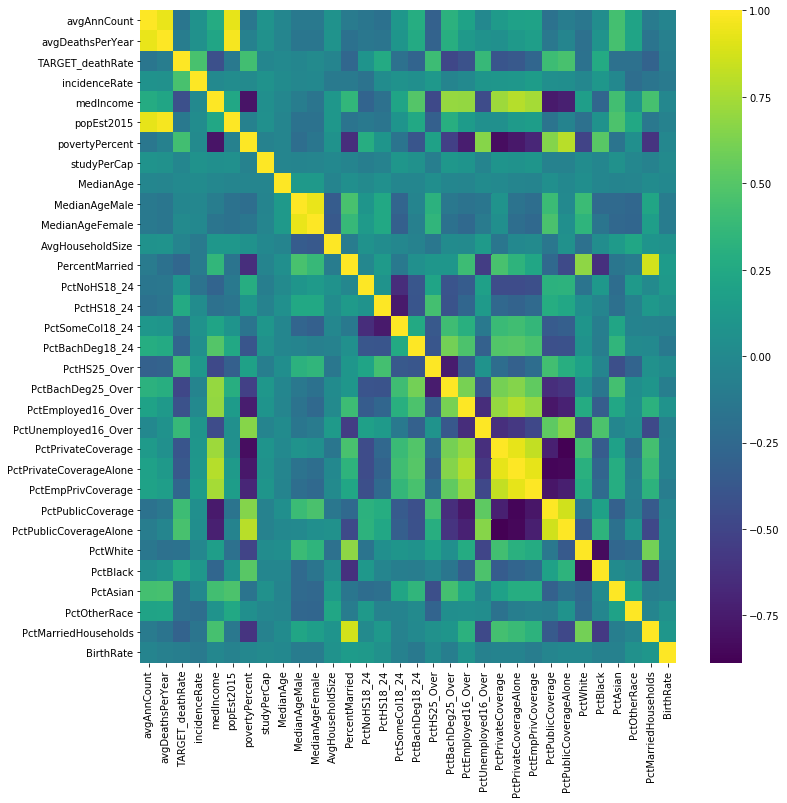

In [7]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), cmap='viridis')
plt.show()

In [8]:
data.corr()['TARGET_deathRate'].sort_values(ascending=False)

TARGET_deathRate           1.000000
incidenceRate              0.449432
PctPublicCoverageAlone     0.449358
povertyPercent             0.429389
PctHS25_Over               0.404589
PctPublicCoverage          0.404572
PctUnemployed16_Over       0.378412
PctHS18_24                 0.261976
PctBlack                   0.257024
PctNoHS18_24               0.088463
MedianAgeFemale            0.012048
MedianAge                  0.004375
MedianAgeMale             -0.021929
studyPerCap               -0.022285
AvgHouseholdSize          -0.036905
BirthRate                 -0.087407
avgDeathsPerYear          -0.090715
popEst2015                -0.120073
avgAnnCount               -0.143532
PctWhite                  -0.177400
PctAsian                  -0.186331
PctSomeCol18_24           -0.188688
PctOtherRace              -0.189894
PercentMarried            -0.266820
PctEmpPrivCoverage        -0.267399
PctBachDeg18_24           -0.287817
PctMarriedHouseholds      -0.293325
PctPrivateCoverageAlone   -0

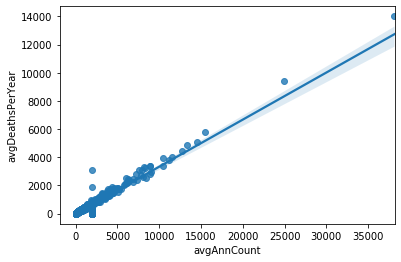

In [37]:
sns.regplot( x = "avgAnnCount", y = 'avgDeathsPerYear' ,data = data)
plt.show()

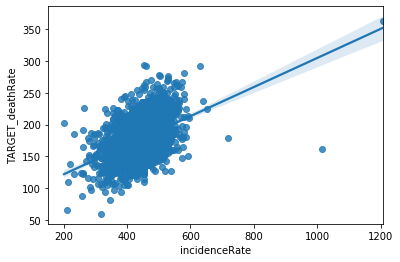

In [38]:
sns.regplot(x = 'incidenceRate', y = 'TARGET_deathRate' , data = data)
plt.show()

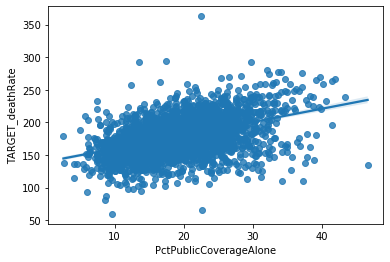

In [39]:
sns.regplot(x = 'PctPublicCoverageAlone', y = 'TARGET_deathRate' , data = data)
plt.show()

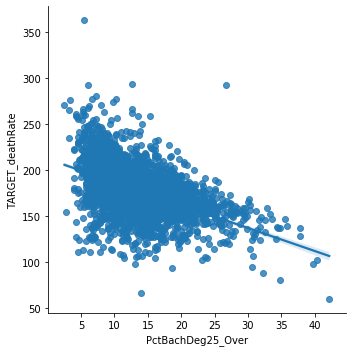

In [40]:
sns.lmplot(x = 'PctBachDeg25_Over', y = 'TARGET_deathRate', data = data)
plt.show()

In [11]:
data.duplicated().sum()

0

In [12]:
data.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [13]:
data.drop('binnedInc', axis=1, inplace=True)

In [14]:
data.drop('Geography', axis=1, inplace=True)

In [15]:
data.drop('PctSomeCol18_24', axis=1, inplace=True)

In [16]:
data['PctEmployed16_Over'].fillna(data['PctEmployed16_Over'].mean(), inplace=True)

In [17]:
data['PctPrivateCoverageAlone'].fillna(data['PctPrivateCoverageAlone'].mean(), inplace=True)

In [18]:
data.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

Separate the Input and Target Features of the data

In [19]:
X = data.drop('TARGET_deathRate', axis=1)
y = data['TARGET_deathRate']

Split the data into Train and Test Sets

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state=42)

Linear Regression Model

In [57]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

Evaluate your model with various Evaluation Metrics

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rms = np.sqrt(mse)

print("Cancer rate MSE:", mse)
print("Cancer rate MAE:", mae)
print("Cancer rate RMS:", rms)

Cancer rate MSE: 346.81452576129294
Cancer rate MAE: 14.294190055265178
Cancer rate RMS: 18.622956955362728


Build Random Forest Model

In [23]:
# Random Forest Model 1
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=1)
rfr.fit(rescaled_X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

In [24]:
 #Random Forest Model 1
mse = mean_squared_error(y_test, y_pred_rfr)
mae = mean_absolute_error(y_test, y_pred_rfr)
rms = np.sqrt(mse)

print("Random Forest Model 1 MSE:", mse)
print("Random Forest Model 1 MAE:", mae)
print("Random Forest Model 1 RMS:", rms)

Random Forest Model 1 MSE: 304.1776664557376
Random Forest Model 1 MAE: 13.304429508196721
Random Forest Model 1 RMS: 17.44068996501393


Build Decision Tree Model

In [25]:
# Decision Tree Model 1
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=1, max_depth=5)
dtr.fit(rescaled_X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

mse = mean_squared_error(y_test, y_pred_dtr)
mae = mean_absolute_error(y_test, y_pred_dtr)
rms = np.sqrt(mse)

print("Decision Tree Model 1 MSE:", mse)
print("Decision Tree Model 1 MAE:", mae)
print("Decision Tree Model 1 RMS:", rms)

Decision Tree Model 1 MSE: 462.6718083271077
Decision Tree Model 1 MAE: 16.294942782638373
Decision Tree Model 1 RMS: 21.509807259180818


Perform Hyperparameter Tunning on Random Forest Model

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {
'bootstrap' : [True],
'max_depth' : [20,25,30],
'min_samples_leaf':[1,2,3,4],
'min_samples_split':[4,6],
'n_estimators' : [100,200]
}
rfr = RandomForestRegressor(random_state=1)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid,
cv=3, n_jobs=-1, verbose=2)
grid_search.fit(rescaled_X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  4.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [27]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 25,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [28]:
y_grid_search = grid_search.predict(X_test)

In [29]:
mse = mean_squared_error(y_test, y_grid_search)
mae = mean_absolute_error(y_test, y_grid_search)
rms = np.sqrt(mse)

print("Grid Search MSE:", mse)
print("Grid Search MAE:", mae)
print("Grid Search RMS:", rms)

Grid Search MSE: 305.7816548340668
Grid Search MAE: 13.311585676936778
Grid Search RMS: 17.48661358965957


Use Feature Selection Technique

In [30]:
from boruta import BorutaPy

In [31]:
forest = RandomForestRegressor(random_state=1)
boruta_selector = BorutaPy(forest, n_estimators = 'auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	16
Tentative: 	5
Rejected: 	9
Iteration: 	9 / 100
Confirmed: 	16
Tentative: 	5
Rejected: 	9
Iteration: 	10 / 100
Confirmed: 	16
Tentative: 	5
Rejected: 	9
Iteration: 	11 / 100
Confirmed: 	16
Tentative: 	5
Rejected: 	9
Iteration: 	12 / 100
Confirmed: 	16
Tentative: 	5
Rejected: 	9
Iteration: 	13 / 100
Confirmed: 	16
Tentative: 	5
Rejected: 	9
Iteration: 	14 / 100
Confirmed: 	16
Tentative: 	5
Rejected: 	9
Iteration: 	15 / 100
Confirmed: 	16
Tentative: 	5
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	16
Tentative: 	5
Rejected: 	9
I

BorutaPy(alpha=0.05,
         estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                         criterion='mse', max_depth=None,
                                         max_features='auto',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=64, n_jobs=None,
                                         oob_score=False,
                                         random_state=RandomState(MT19937) at 0x2DC4985D08,
                                         verbose=0, warm_start=False),
         max_iter=100, n_estimators='auto', perc=100,
         random_s

In [32]:
print("Selected Features: ", boruta_selector.support_) # check selected features


print("Ranking: ",boruta_selector.ranking_) # check ranking of features

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [False  True  True  True  True  True False False False False  True  True
 False  True False  True  True  True  True  True False False False  True
  True  True False  True  True  True]
Ranking:  [ 2  1  1  1  1  1 11  9  8  3  1  1  4  1  5  1  1  1  1  1 10  6  7  1
  1  1  2  1  1  1]
No. of significant features:  19


In [33]:
# Displaying Feature rank wise
selected_rf_features = pd.DataFrame({'Features':list(X_train.columns),
'Ranking': boruta_selector.ranking_

})
selected_rf_features.sort_values(by='Ranking')

,Features,Ranking
29,BirthRate,1
17,PctEmployed16_Over,1
16,PctBachDeg25_Over,1
15,PctHS25_Over,1
28,PctMarriedHouseholds,1
13,PctHS18_24,1
23,PctPublicCoverageAlone,1
11,PercentMarried,1
10,AvgHouseholdSize,1
24,PctWhite,1


In [34]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

In [35]:
forest_important = RandomForestRegressor(random_state=1, n_estimators=1000, n_jobs=-1)
forest_important.fit(X_important_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [36]:
y_important_pred = forest_important.predict(X_important_test)

mse = mean_squared_error(y_test, y_important_pred)
mae = mean_absolute_error(y_test, y_important_pred)
rms = np.sqrt(mse)

print("Boruta MSE:", mse)
print("Boruta MAE:", mae)
print("Boruta RMS:", rms)

Boruta MSE: 313.66502304439354
Boruta MAE: 13.413363278688545
Boruta RMS: 17.710590702864586
